In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
census_data = pd.read_csv("adult.csv")

# Context

Рассмотрим первые записи датасета:

In [4]:
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
census_data.shape

(32561, 15)

In [6]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data quality assessment

In [7]:
census_data.duplicated().any()

True

Есть дублирование данных, которые следует удалить.

In [8]:
census_data = census_data.drop_duplicates(keep = "first")

Можно заметить наличие знаков ? в датасете. Это null значения. Необходимо найти все колонки с таким значением и заменить на моду (если там значительно выделяется на фоне остальных) или среднее значение.

# Data exploration

In [9]:
census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


Среднее значение возраста 38,59 с медианой 37, что говорит об уже взрослых людях, которые могут иметь семьи, что надо будет скорее всего учитывать.
fnlwht показывает вес, который связан со многими факторами, но нам надо будет это учитывать со страной, к которой он принадлежит.
Можно заметить, что данные в колонках "capital.gain" и "capital.loss" сильно разбросаны. В нашем случае большое количество крайних значений 0 в большинстве строчек.

Колонка "relationship" не сможет дать нам данные для размышления, поэтому ее можно удалить.

In [10]:
del census_data['relationship']

### Income

<AxesSubplot:xlabel='income', ylabel='Count'>

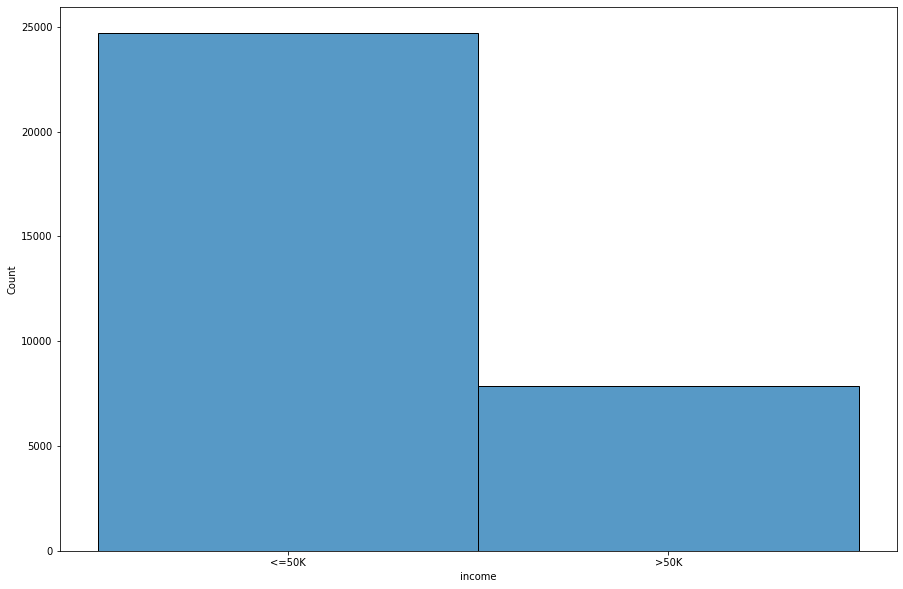

In [11]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'income')

In [12]:
census_data['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

Количество людей, получающий больше 50к, в 3 раза меньше остальных.

### Age

<AxesSubplot:xlabel='age', ylabel='Count'>

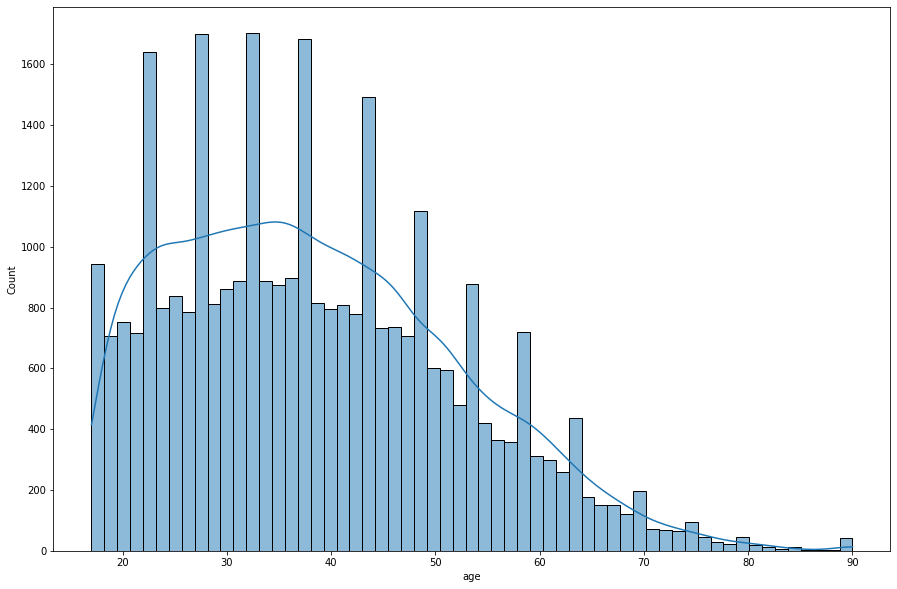

In [13]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'age', kde = True)

<AxesSubplot:xlabel='age'>

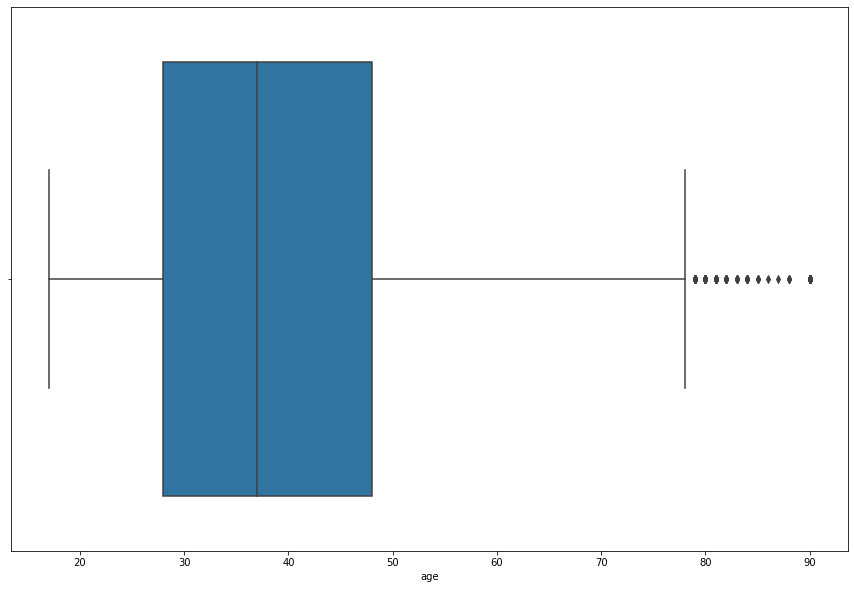

In [14]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = census_data, x = 'age')

In [15]:
census_data['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Хоть средний возраст и 38.59, но медиана составляет 37, что говорит о преобладании количества людей слева от 38.59. Но такое среднее значение получено из-за экстримальных показателей ближе к 90 лет.

In [16]:
census_data.groupby(['income'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


Больше 50к получают люди более старшего поколения.

### Workclass

<AxesSubplot:xlabel='workclass', ylabel='Count'>

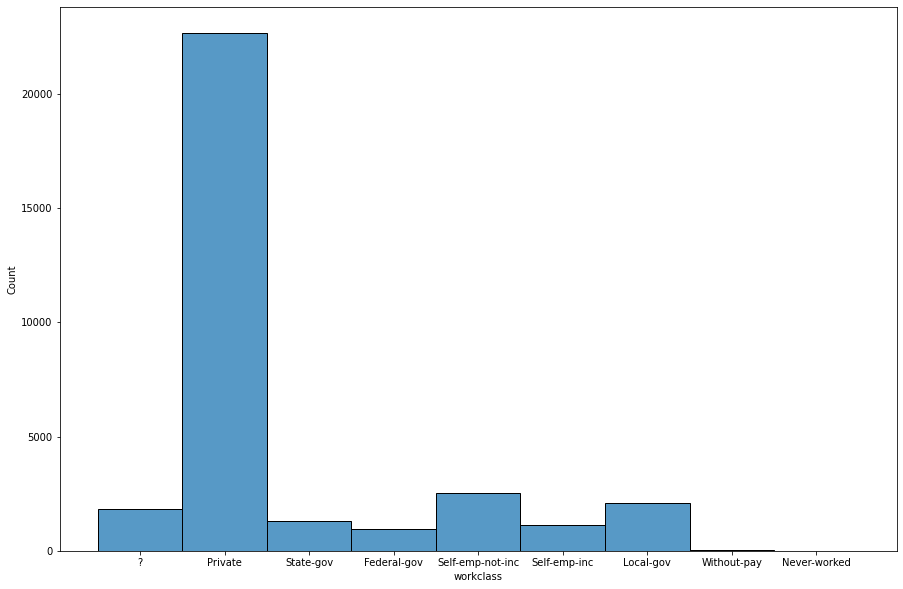

In [17]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'workclass')

In [18]:
census_data['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Большинство людей относится к "Private", так что им можно заменить null значения.

In [19]:
census_data.groupby(['workclass', 'income']).size()

workclass         income
?                 <=50K      1645
                  >50K        191
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      <=50K       494
                  >50K        622
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Without-pay       <=50K        14
dtype: int64

Логично, что те, кто не работают или без оплаты, не могут получать больше 50к в год.
Если посмотреть на сектор "Private", который представляет большинство людей, то там количество зарабатывающих больше 50к примерно в 3 раза меньше остальных этого же сектора. В "Self-emp-inc" люди скорее зарабатывают больше 50к.

### Education

<AxesSubplot:xlabel='education', ylabel='Count'>

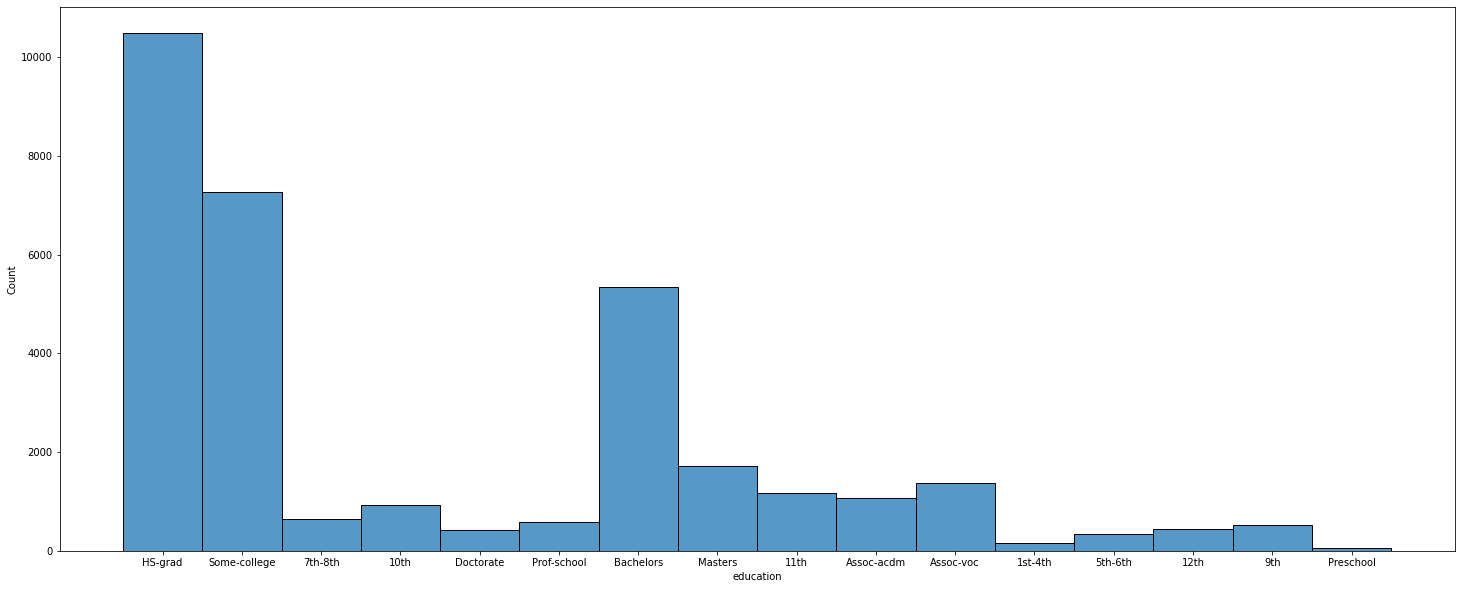

In [20]:
plt.figure(figsize = (25, 10))
sns.histplot(data = census_data, x = 'education')

In [21]:
census_data['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

График показывает, что большинство людей закончили старшую школу, посещали колледж или имеют степень бакалавра.

In [22]:
census_data.groupby(['education', 'income']).size()

education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8820
              >50K      1674
Masters       <=50K      763
              >50K       959
Preschool     <=50K       50
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5896
              >50K      1386
dtype: int64

У кого низкий уровень обучения получают скорее всего меньше 50к, но есть и исключения. Они либо занимались сами, либо через свой опыт.
У тех, кто имеет степень бакалавра, есть небольшой разрыв в границе заработка. Это скорее всего из-за того, что бакалавра можно получить в разных сферах, а также есть человеческий фактор. Люди с высоким уровнем обучения чаще имеют больше 50к. Те, у кого прешкольное образование, не получают больше 50к вообще.

In [23]:
census_data.groupby(['education', 'workclass']).size()

education     workclass       
10th          ?                    100
              Federal-gov            6
              Local-gov             31
              Never-worked           2
              Private              695
              Self-emp-inc          19
              Self-emp-not-inc      67
              State-gov             13
11th          ?                    118
              Federal-gov            9
              Local-gov             36
              Never-worked           1
              Private              923
              Self-emp-inc          14
              Self-emp-not-inc      60
              State-gov             14
12th          ?                     40
              Federal-gov            5
              Local-gov             19
              Private              333
              Self-emp-inc           7
              Self-emp-not-inc      19
              State-gov             10
1st-4th       ?                     12
              Local-gov          

Можно заметить, что несмотря на уровень образования, везде пробладает "private" сектор. 
Те, кто никогда не работал, с вероятностью наполовину не закончили обучение в каком-то классе. 
Те, кто работает без оплаты, скорее всего - старшую школу или колледж.

### Marital status

<AxesSubplot:xlabel='marital.status', ylabel='Count'>

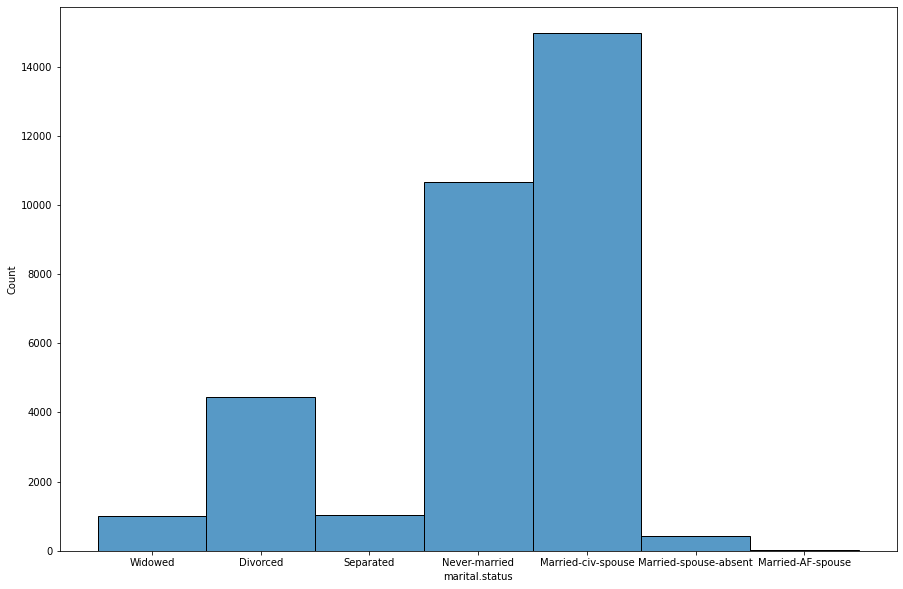

In [24]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'marital.status')

In [25]:
census_data['marital.status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

Самое большой показатель у женатых на гражданском. На треть меньше идут те, кто никогда не женился, а еще на треть меньше те, кто сейчас разведен.

In [26]:
census_data.groupby(['marital.status', 'income']).size()

marital.status         income
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
dtype: int64

Те, кто состоят в браке с гражданским, имеют небольшой разрыв в границе заработка. 
Но есть значительное отличие у тех, кто никогда не женился.

<AxesSubplot:xlabel='marital.status', ylabel='age'>

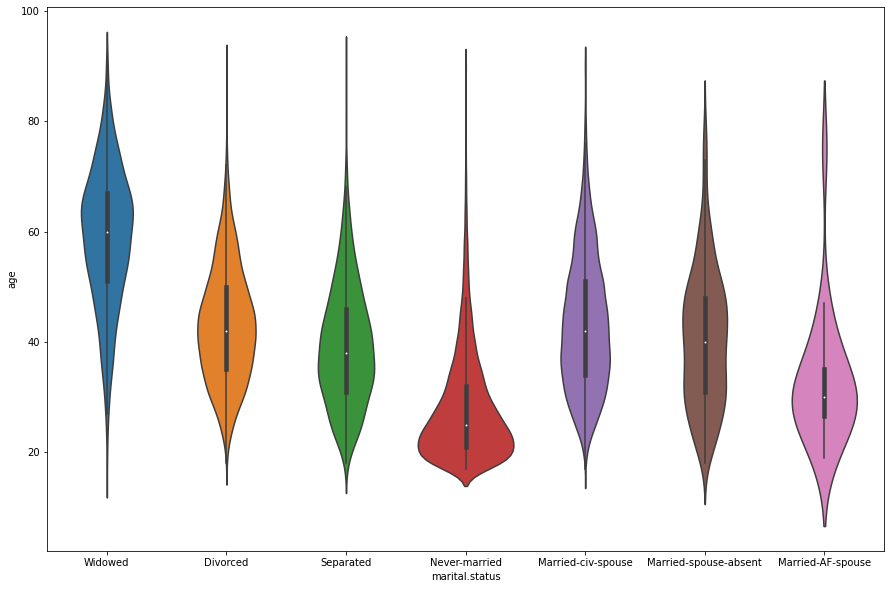

In [27]:
plt.figure(figsize = (15, 10))
sns.violinplot(data = census_data, x = 'marital.status', y = 'age')

Те, кто никогда не женился, обычно являются молодыми людьми, поэтому и могут получать меньше старшего поколения.

### Ocupation

<AxesSubplot:xlabel='occupation', ylabel='Count'>

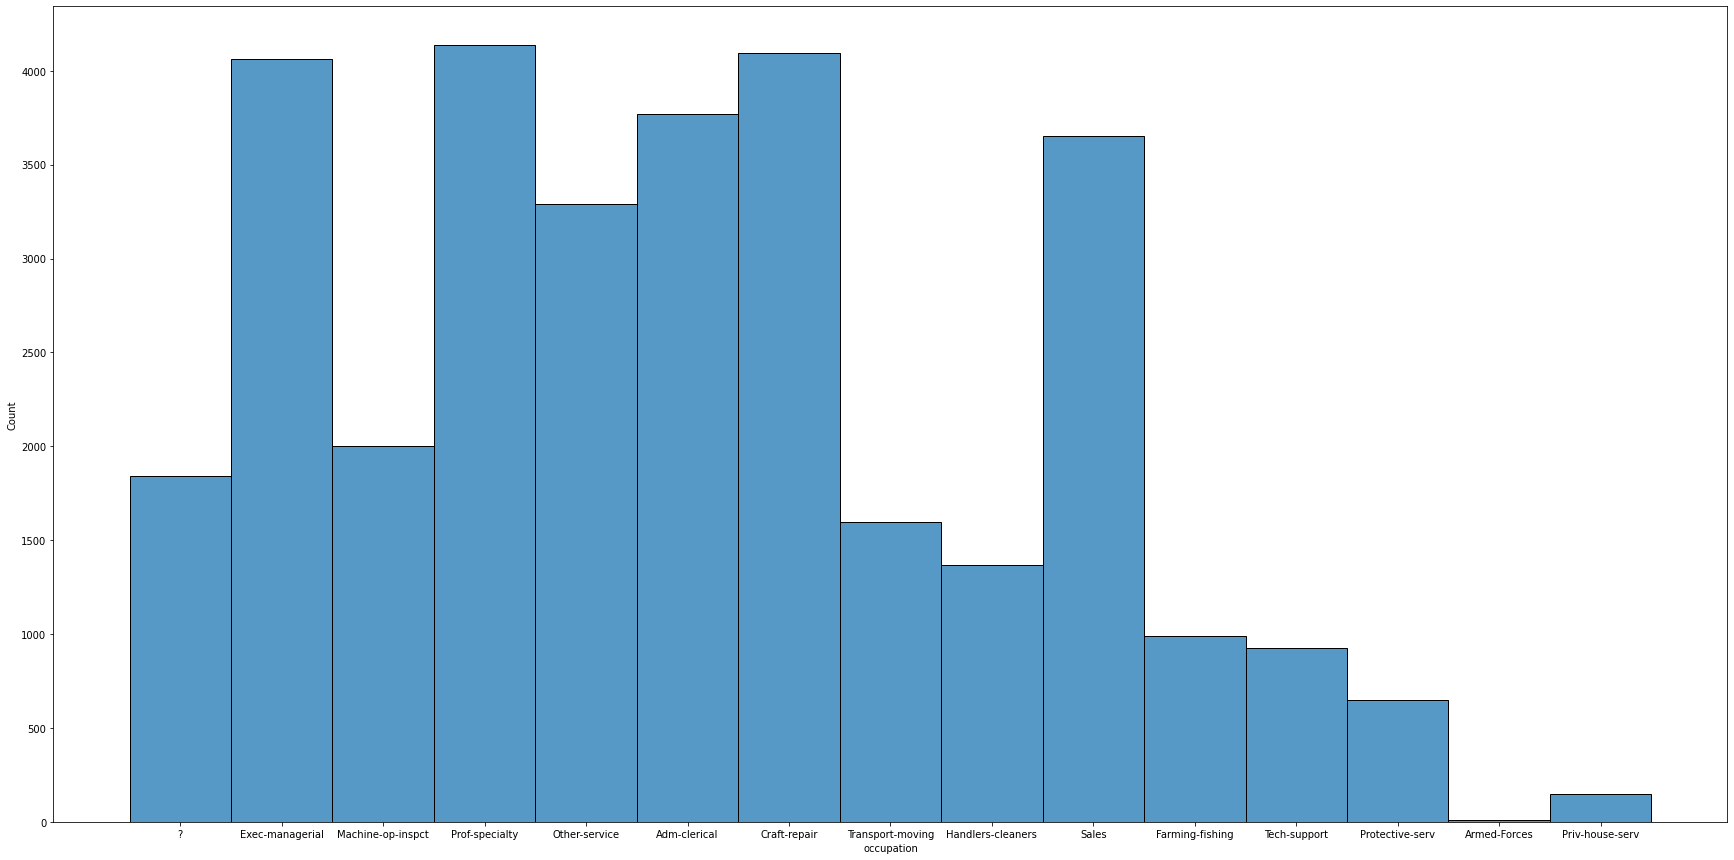

In [28]:
plt.figure(figsize = (30, 15))
sns.histplot(data = census_data, x = 'occupation')

In [29]:
census_data['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

Здесь нет какого-то определенного значения, которое стояло бы выше других, поэтому надо посмотреть зависимость с другими колонками.

In [30]:
census_data.groupby(['occupation', 'income']).size()

occupation         income
?                  <=50K     1652
                   >50K       191
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=5

Хорошие показатели заработка у тех, кто работает выполняющим менеджером или имеет профессиональную специалность.
Огромные отличия видны у клинеров и тех, кто следит за домом.

In [31]:
census_data.groupby(['occupation', 'education']).size()

occupation         education   
?                  10th             102
                   11th             119
                   12th              40
                   1st-4th           12
                   5th-6th           30
                   7th-8th           73
                   9th               51
                   Assoc-acdm        47
                   Assoc-voc         61
                   Bachelors        173
                   Doctorate         15
                   HS-grad          533
                   Masters           48
                   Preschool          5
                   Prof-school       18
                   Some-college     516
Adm-clerical       10th              38
                   11th              67
                   12th              38
                   5th-6th            6
                   7th-8th           11
                   9th               14
                   Assoc-acdm       193
                   Assoc-voc        167
        

In [32]:
census_data.groupby(['occupation'])['education.num'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,9.253391,2.602791,1.0,9.0,9.0,10.0,16.0
Adm-clerical,3768.0,10.113588,1.698497,1.0,9.0,10.0,11.0,16.0
Armed-Forces,9.0,10.111111,2.027588,8.0,9.0,9.0,10.0,14.0
Craft-repair,4094.0,9.110894,2.037377,1.0,9.0,9.0,10.0,16.0
Exec-managerial,4065.0,11.449446,2.143353,2.0,10.0,12.0,13.0,16.0
Farming-fishing,992.0,8.615927,2.748207,1.0,8.0,9.0,10.0,16.0
Handlers-cleaners,1369.0,8.514244,2.199145,1.0,7.0,9.0,10.0,14.0
Machine-op-inspct,2000.0,8.487000,2.286361,1.0,9.0,9.0,9.0,16.0
Other-service,3291.0,8.778791,2.300850,1.0,8.0,9.0,10.0,16.0


Из интересного видно то, что в "Prof-speciality" собралось больше всего людей с высоким уровнем образования, а потом уже идут выполняющие обязанности менеджера и тех поддержка.
Меньше всего уровень образования в присмотре за домом.

In [33]:
census_data.groupby(['occupation', 'workclass']).size()

occupation         workclass       
?                  ?                   1836
                   Never-worked           7
Adm-clerical       Federal-gov          317
                   Local-gov            283
                   Private             2831
                   Self-emp-inc          31
                   Self-emp-not-inc      50
                   State-gov            253
                   Without-pay            3
Armed-Forces       Federal-gov            9
Craft-repair       Federal-gov           64
                   Local-gov            146
                   Private             3191
                   Self-emp-inc         106
                   Self-emp-not-inc     530
                   State-gov             56
                   Without-pay            1
Exec-managerial    Federal-gov          180
                   Local-gov            214
                   Private             2690
                   Self-emp-inc         400
                   Self-emp-not-inc     

Как всегда преобладает "Private" сектор, кроме фермерства и рыболовства, где на равне держится еще и "Self-emp-not-inc", но также тут больше всего тех, кто работает без оплаты.

### Race

<AxesSubplot:xlabel='race', ylabel='Count'>

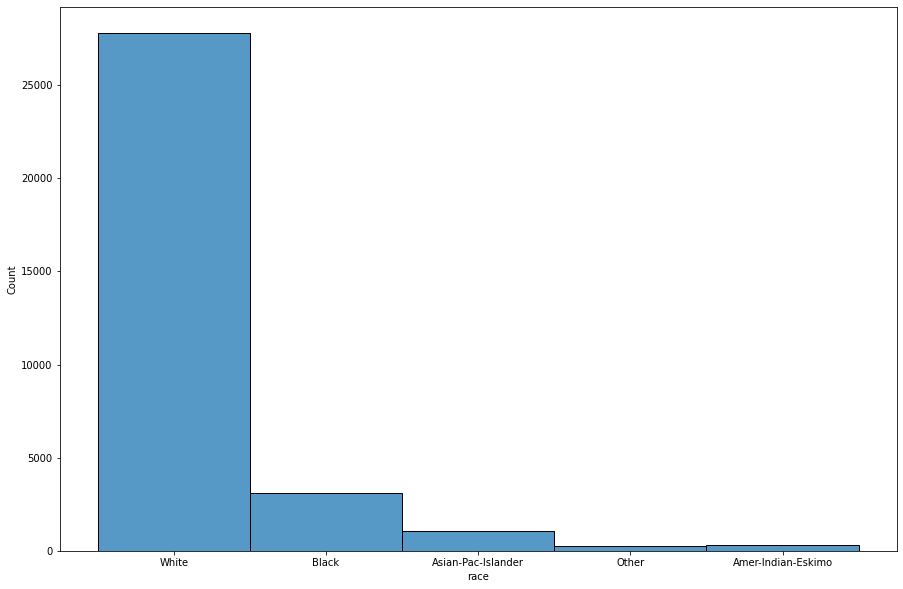

In [34]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'race')

In [35]:
census_data['race'].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [36]:
census_data.groupby(['race', 'income']).size()

race                income
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
dtype: int64

Меньше всего отличий (примерно в 3 раза) имеют белые люди и азиаты с жителями островов Тихого океана. У остальных же разрыв больше, особенно в "Other". Это скорее всего связано с образованием.

In [37]:
census_data.groupby(['education', 'race']).size()

education     race              
10th          Amer-Indian-Eskimo      16
              Asian-Pac-Islander      13
              Black                  133
              Other                    9
              White                  762
11th          Amer-Indian-Eskimo      14
              Asian-Pac-Islander      21
              Black                  153
              Other                   10
              White                  977
12th          Amer-Indian-Eskimo       5
              Asian-Pac-Islander       9
              Black                   70
              Other                   14
              White                  335
1st-4th       Amer-Indian-Eskimo       4
              Asian-Pac-Islander       5
              Black                   16
              Other                    9
              White                  132
5th-6th       Amer-Indian-Eskimo       2
              Asian-Pac-Islander      18
              Black                   21
              Other     

In [38]:
census_data.groupby(['race'])['education.num'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,9.311897,2.310387,2.0,9.0,9.0,10.0,16.0
Asian-Pac-Islander,1038.0,10.961464,2.812779,1.0,9.0,10.0,13.0,16.0
Black,3122.0,9.486227,2.298594,1.0,9.0,9.0,10.0,16.0
Other,271.0,8.841328,3.226153,1.0,7.5,9.0,10.0,16.0
White,27795.0,10.136571,2.568873,1.0,9.0,10.0,13.0,16.0


Белые люди, а также азиаты и жители островов Тихого океана имеют более высокий уровень образования.

### Sex

<AxesSubplot:xlabel='sex', ylabel='Count'>

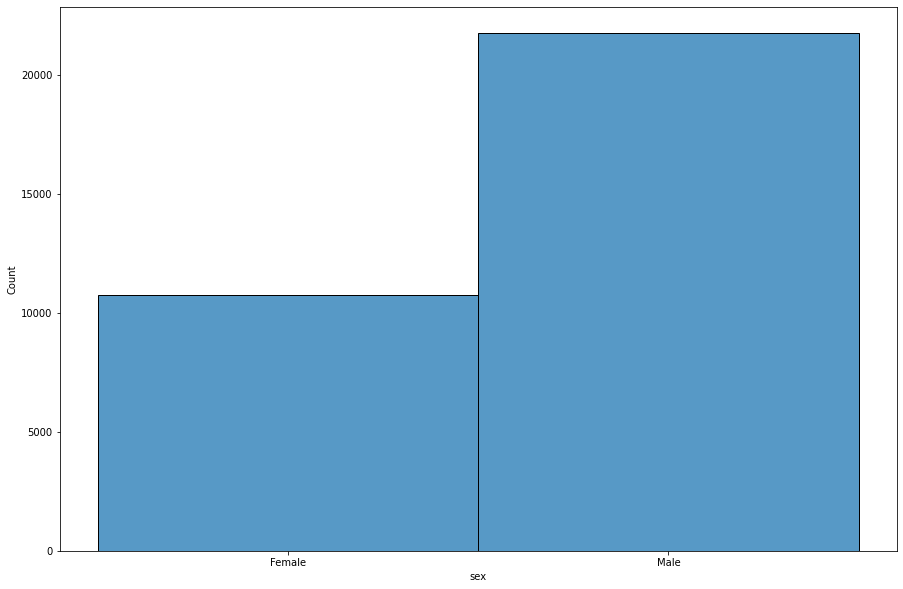

In [39]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'sex')

In [40]:
census_data['sex'].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

Мужчин в два раза больше, чем женщин в этом датасете.

In [41]:
census_data.groupby(['sex', 'income']).size()

sex     income
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
dtype: int64

Заметно, что мужчина с большей вероятностью будет получать больше 50к. Чтобы найти причину, надо посмотреть соотношения пола с другими показателями.

<AxesSubplot:xlabel='sex', ylabel='age'>

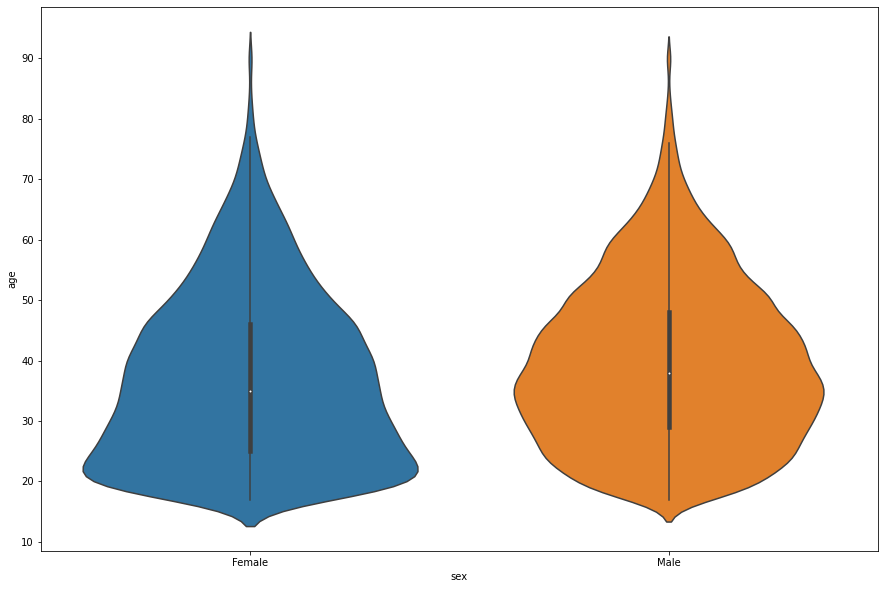

In [42]:
plt.figure(figsize = (15, 10))
sns.violinplot(data = census_data, x = 'sex', y = 'age')

In [43]:
census_data.groupby(['sex'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10762.0,36.864709,14.015010,17.0,25.0,35.0,46.0,90.0
Male,21775.0,39.436051,13.366506,17.0,29.0,38.0,48.0,90.0


In [44]:
census_data.groupby(['sex']).agg({'age': [pd.Series.mode]})

,age
,mode
sex,
Female,20
Male,35


Средний возраст мужчин лишь на пару лет больше, чем женщин, но разброс стоит чуть выше.
Также мода указывает на то, что преобладают молодые женщины, но есть высокие показатели возраста, которые повышают среднее значение.

In [45]:
census_data.groupby(['education', 'sex']).size()

education     sex   
10th          Female     295
              Male       638
11th          Female     432
              Male       743
12th          Female     144
              Male       289
1st-4th       Female      44
              Male       122
5th-6th       Female      84
              Male       248
7th-8th       Female     160
              Male       485
9th           Female     144
              Male       370
Assoc-acdm    Female     421
              Male       646
Assoc-voc     Female     500
              Male       882
Bachelors     Female    1618
              Male      3735
Doctorate     Female      86
              Male       327
HS-grad       Female    3388
              Male      7106
Masters       Female     536
              Male      1186
Preschool     Female      16
              Male        34
Prof-school   Female      92
              Male       484
Some-college  Female    2802
              Male      4480
dtype: int64

In [46]:
census_data.groupby(['sex'])['education.num'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10762.0,10.037168,2.378213,1.0,9.0,10.0,12.0,16.0
Male,21775.0,10.103881,2.661820,1.0,9.0,10.0,13.0,16.0


Те, кто закончил профессиональную школу, получил степень доктора, являются по больше части мужчинами. А именно в этих сферах в большинстве своем получают больше 50к.

In [47]:
census_data.groupby(['occupation', 'sex']).size()

occupation         sex   
?                  Female     841
                   Male      1002
Adm-clerical       Female    2535
                   Male      1233
Armed-Forces       Male         9
Craft-repair       Female     222
                   Male      3872
Exec-managerial    Female    1159
                   Male      2906
Farming-fishing    Female      65
                   Male       927
Handlers-cleaners  Female     164
                   Male      1205
Machine-op-inspct  Female     549
                   Male      1451
Other-service      Female    1799
                   Male      1492
Priv-house-serv    Female     139
                   Male         8
Prof-specialty     Female    1513
                   Male      2623
Protective-serv    Female      76
                   Male       573
Sales              Female    1263
                   Male      2387
Tech-support       Female     347
                   Male       580
Transport-moving   Female      90
                   Mal

Количество женщин в работах клерком, присмотром за домом и других сервисах преобладает над мужчинами, а эти сферы в основном не получают больше 50к.

### Capital gain

<AxesSubplot:xlabel='capital.gain', ylabel='Count'>

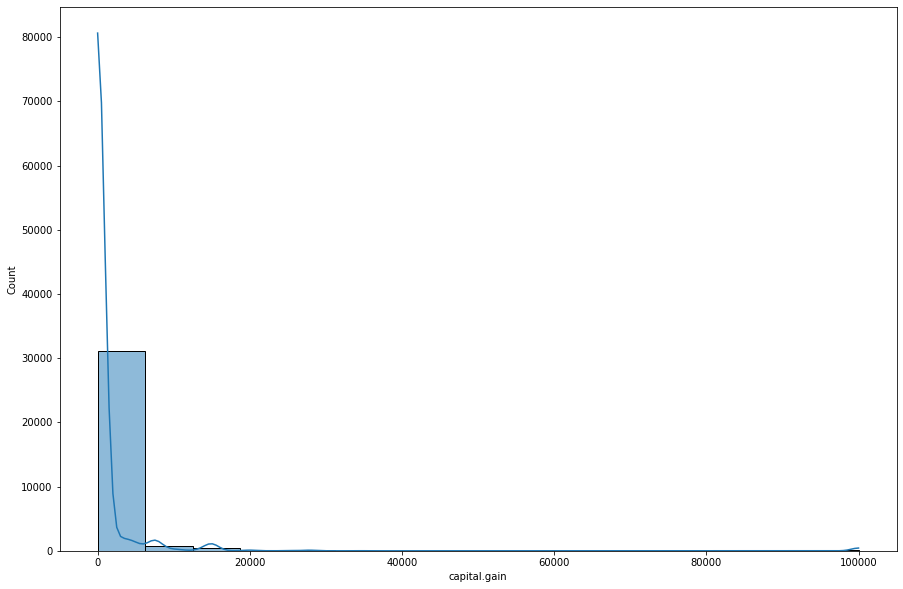

In [48]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'capital.gain', kde = True)

<AxesSubplot:xlabel='capital.gain'>

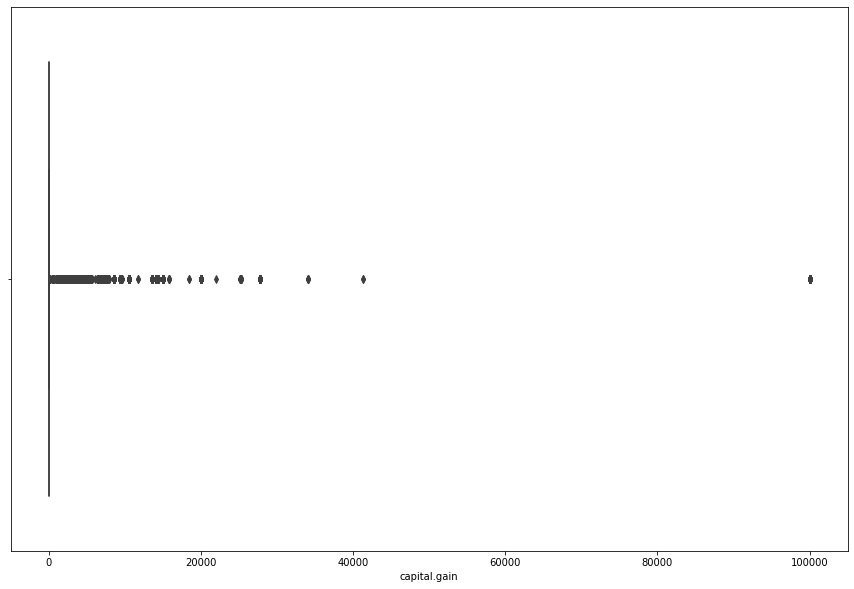

In [49]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = census_data, x = 'capital.gain')

In [50]:
census_data['capital.gain'].describe()

count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

Огромное количество людей имеют нулевой прирост капитала. Только единицы имеют экстремальные значения, что и сместило среднее значение.

In [51]:
census_data.groupby(['income'])['capital.gain'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,148.884970,963.557955,0.0,0.0,0.0,0.0,41310.0
>50K,7839.0,4007.164562,14572.097223,0.0,0.0,0.0,0.0,99999.0


Человек с приростом капитала с большей вероятносью будет получать больше 50к.

### Capital loss

<AxesSubplot:xlabel='capital.loss', ylabel='Count'>

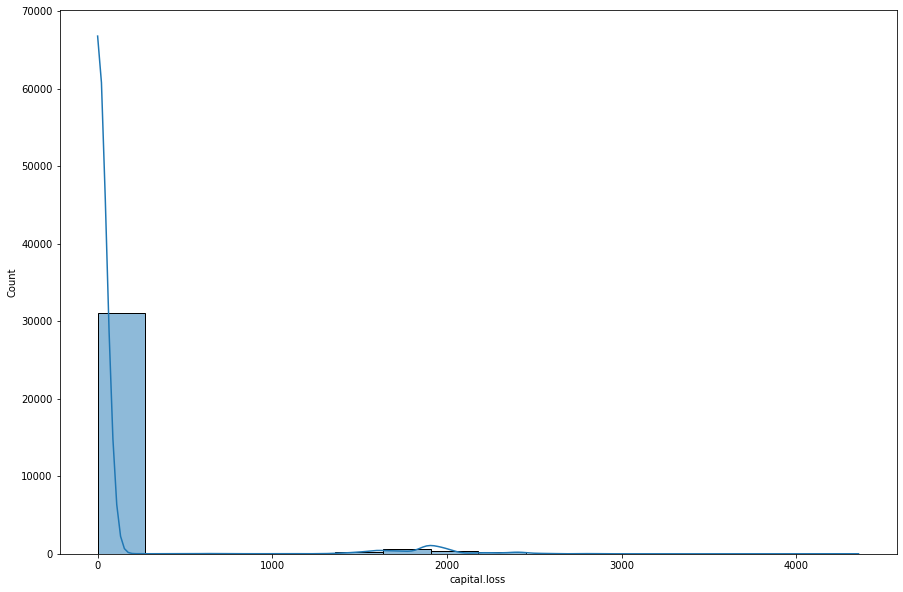

In [52]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'capital.loss', kde = True)

<AxesSubplot:xlabel='capital.loss'>

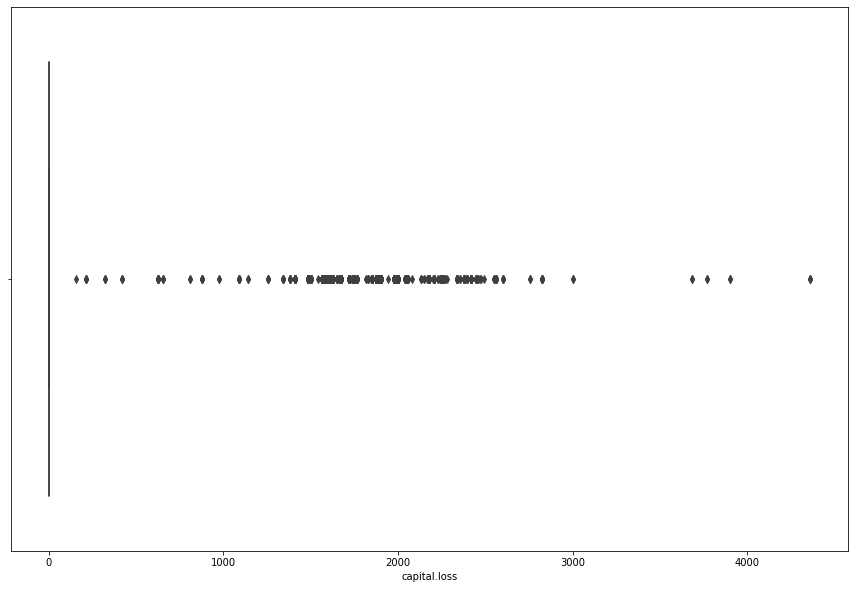

In [53]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = census_data, x = 'capital.loss')

In [54]:
census_data['capital.loss'].describe()

count    32537.000000
mean        87.368227
std        403.101833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

Практически все имеют нулевые потери капитала.

In [55]:
census_data.groupby(['income'])['capital.loss'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,53.190258,310.890099,0.0,0.0,0.0,0.0,4356.0
>50K,7839.0,195.051282,595.555395,0.0,0.0,0.0,0.0,3683.0


Интересно, что среднее значение потери капитала выше у тех, кто получает больше 50к, но тут надо посмотреть на огромный разброс и то, что максимальное значение все-таким меньше, чем у тех, кто получает ниже 50к.

### Hours per week

<AxesSubplot:xlabel='hours.per.week', ylabel='Count'>

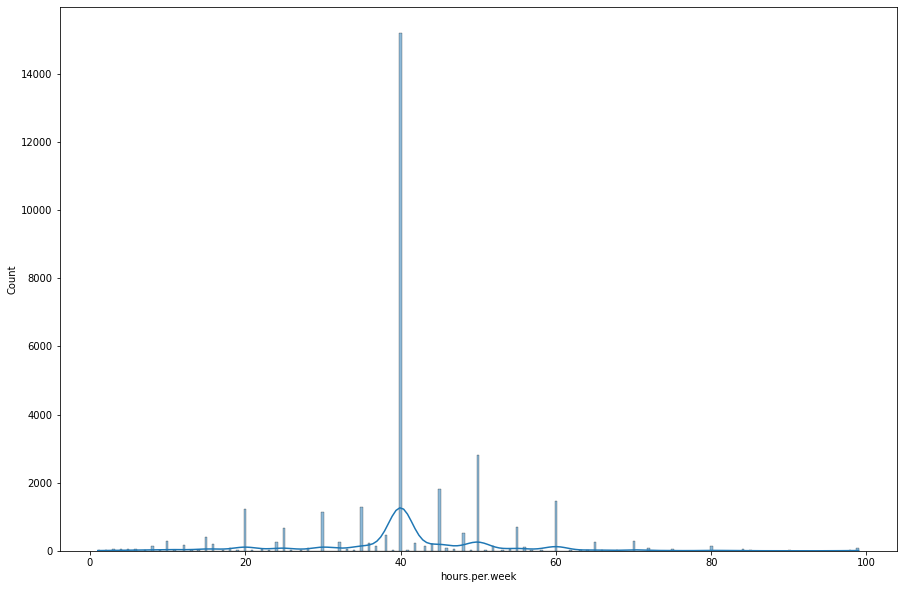

In [56]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'hours.per.week', kde = True)

<AxesSubplot:xlabel='hours.per.week'>

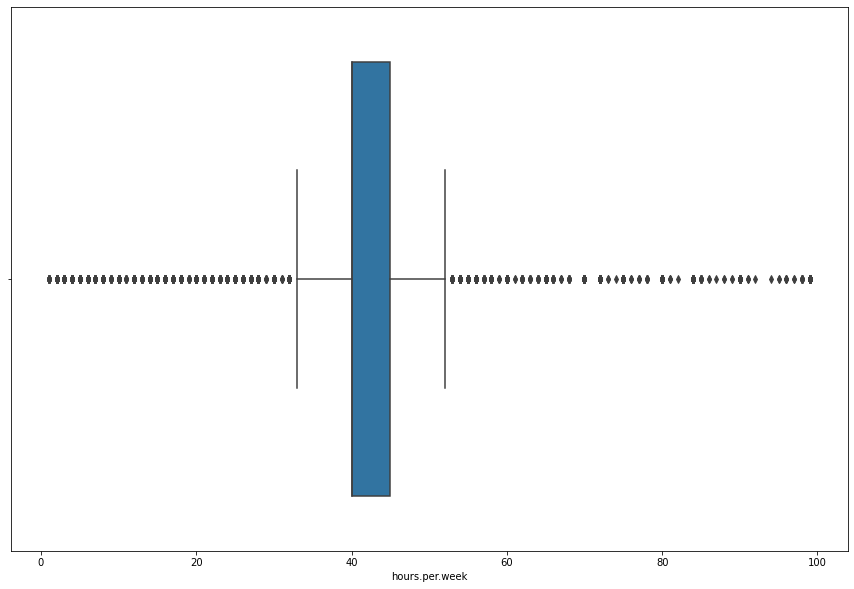

In [57]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = census_data, x = 'hours.per.week')

In [58]:
census_data['hours.per.week'].describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

Среднее количество рабочих часов в неделю - 40.

In [59]:
census_data.groupby(['income'])['hours.per.week'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,38.842862,12.318286,1.0,35.0,40.0,40.0,99.0
>50K,7839.0,45.473402,11.014165,1.0,40.0,40.0,50.0,99.0


Люди, получающие больше 50к, работают чуть больше остальных.

### Native country

In [60]:
census_data['native.country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

США предсталяет собой моду и выступает значительно больше остальных, поэтому null значения можно заменить на них.

In [61]:
census_data.groupby(['native.country', 'income']).size()

native.country              income
?                           <=50K       436
                            >50K        146
Cambodia                    <=50K        12
                            >50K          7
Canada                      <=50K        82
                            >50K         39
China                       <=50K        55
                            >50K         20
Columbia                    <=50K        57
                            >50K          2
Cuba                        <=50K        70
                            >50K         25
Dominican-Republic          <=50K        68
                            >50K          2
Ecuador                     <=50K        24
                            >50K          4
El-Salvador                 <=50K        97
                            >50K          9
England                     <=50K        60
                            >50K         30
France                      <=50K        17
                            >50K         

Очень мало данных по странам, кроме США, поэтому довольно трудно делать однозначный вывод по зависимости страны происхождения от заработка. Можно лишь найти тенденцию, что если человек приехал из развитой страны, то с большой вероятностью будет получать выше 50к, но есть и исключения.

### Fnlwgt

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

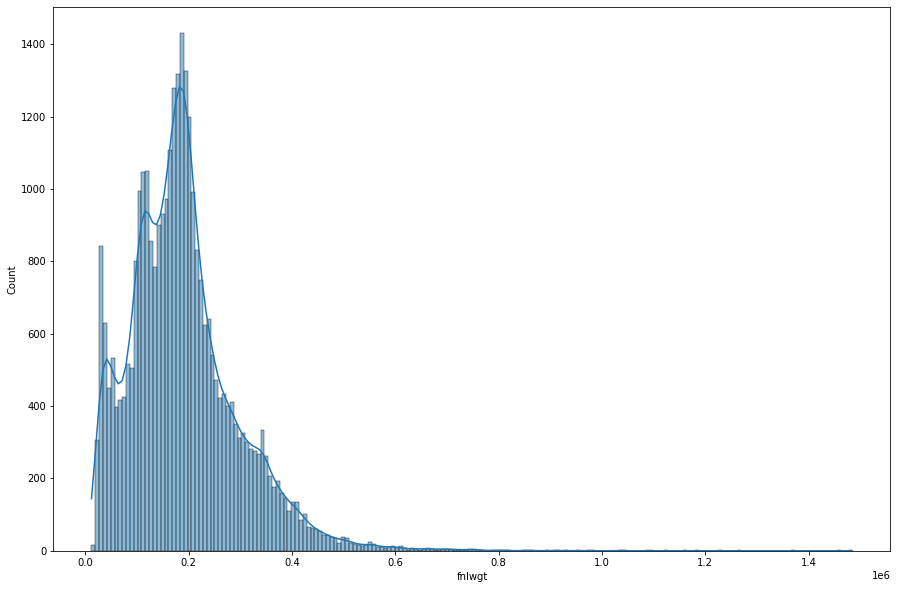

In [62]:
plt.figure(figsize = (15, 10))
sns.histplot(data = census_data, x = 'fnlwgt', kde = True)

<AxesSubplot:xlabel='fnlwgt'>

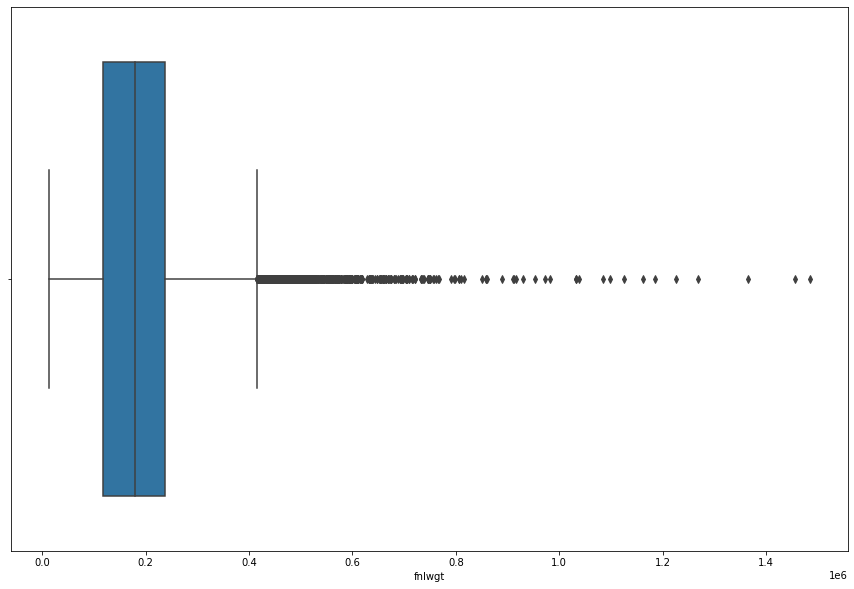

In [63]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = census_data, x = 'fnlwgt')

In [64]:
census_data['fnlwgt'].describe()

count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [65]:
census_data.groupby(['income'])['fnlwgt'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,190345.926796,106487.413197,12285.0,117606.0,179465.0,238968.25,1484705.0
>50K,7839.0,188000.480674,102554.464101,14878.0,119100.0,176063.0,230969.00,1226583.0


Различия не очень большие, но те, кто полчает меньше 50к, имеют чуть больший fnlwgt.

### Заполнение пустых значений

In [66]:
census_data = census_data.replace(to_replace = '?', value = np.nan) 
census_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

Все неизвестные значения находятся в колонках "workclass", "occupation" и "native.country". С "workclass" и "native.country" все довольно понятно, так как там выступало одно значение, которое стояло значительно выше других. C "occupation" такого не было, а сравнение с другими колнками не привело к какому-то однозначному результату, поэтому было выбрано использовать все-таки моду.

In [67]:
null_columns = census_data.columns[census_data.isnull().any()]
for i in list(null_columns):
    census_data[i].fillna(census_data[i].mode().values[0], inplace = True)

# Summary

Данный датасет был в некоторых аспектах необъективен: 
а) мужчин в два раза больше, чем женщин;
б) почти все родились в США;
в) многие являются белыми людьми;
г) смещение в сторону тех, кто зарабатывает меньше 50к.
Основными показателями получения заработка больше 50к оказались образование, сфера работы и возраст как основные причины. Люди с выоким уровнем образования, которые еще и работали в выосокооплачиваемых областях, с большей вероятностью получали больше 50к. Возраст влияет на опыт и должность, что тоже дает большие отличия, а также оказывает влияние на другие показатели. Так, например, теми, кто никогда не состоял в браке (зарабатывают меньше 50к), являются в основном молодые люди. Мужчины в данном датасете чаще зарабатывают больше 50к, чем женщины, так как имеют более высокий уровень образования, а последние работают в низкооплачиваемых областях. Заметно, что многие не имеют как прироста, так и потери капитала, и работают 40 часов в неделю.